# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Objective:


*   Identify Optimal hyperplane.
*   SVM Kernels.
*   Deal with the non-linear and inseparable plane.
*   Perform binary and multi-class classification on Iris dataset and get the support vectors that are the basis for the max margin.

Linear data separable

*  Find the extreme points of the dataset, which are called support vectors.
*  Get the optimal hyperplane which has the highest margin between the line and support vectors
<br><br>

![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)

Non-linear and inseparable planes

*  Use Kernels to transform data into higher dimensions.
*  Separate the points using Linear SVM

![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/non_linear_data.png)

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "Demo_Non_Linear_SVM_multi-class" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Data Loading and Visualization

## Import libraries

In [4]:
!pip install mlxtend --upgrade --no-deps

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

## Load dataset

In [6]:
iris = sns.load_dataset("iris")

**View the data features**

In [7]:
# Print the first 5 rows of the data
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**Perform feature correlation to find linearly and non-linear separable classes that can be classified using SVM**

For More information regarding `sns.pairplot` refer following [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


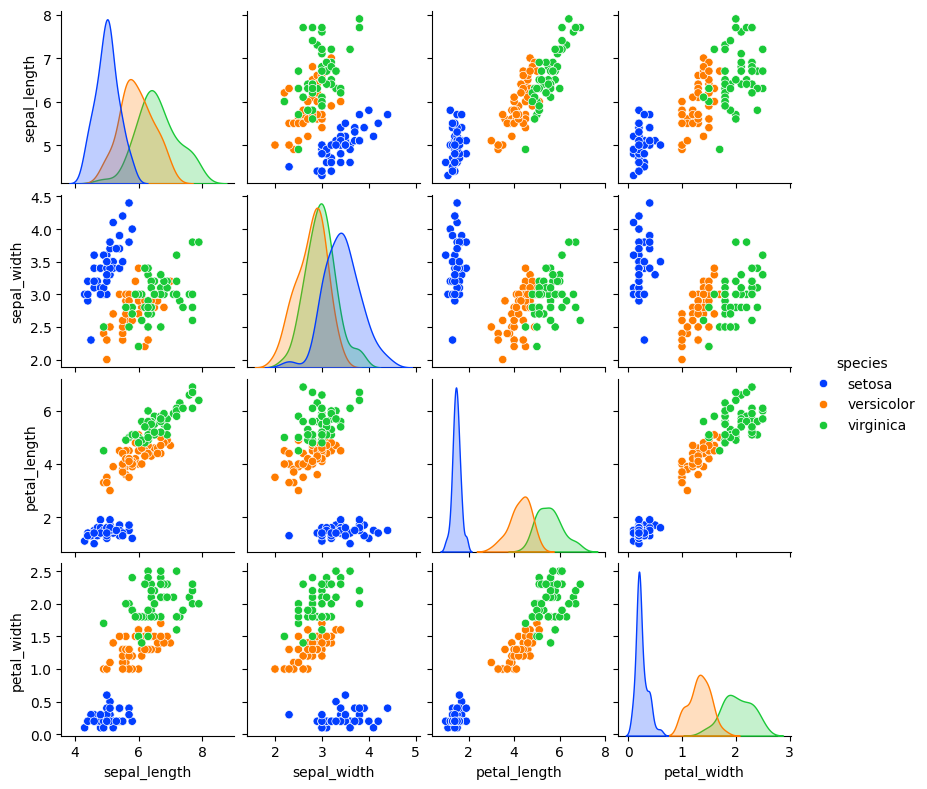

In [8]:
sns.pairplot(iris, hue="species",palette="bright", height=2, aspect=1)

## Case 1: Binary Classification with non-linear data

Considering Versicolor and Virginica classes from the Iris dataset, we see that data is not linearly separable. Let us transform the data to 3D to check the data separation in multi-dimension. We can apply rbf kernel to separate the classes.
- Labels are Versicolor and Virginica
- Features are petal_length and petal_width

In [9]:
df = iris[(iris['species'] != 'setosa')]
df = df.drop(['sepal_length','sepal_width'], axis=1)
df.head()

,petal_length,petal_width,species
50,4.7,1.4,versicolor
51,4.5,1.5,versicolor
52,4.9,1.5,versicolor
53,4.0,1.3,versicolor
54,4.6,1.5,versicolor


/tmp/ipython-input-10-3857658381.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('virginica', 2)


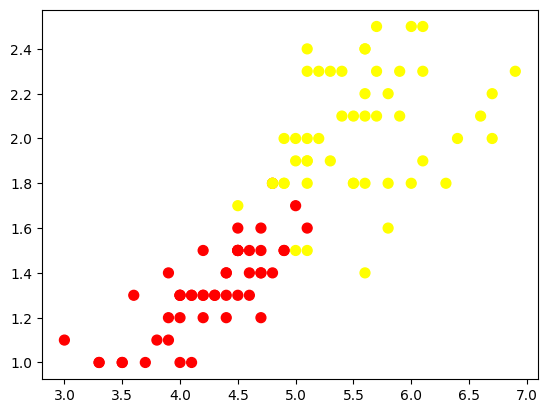

In [10]:
# Convert categorical values to numerical values
df = df.replace('versicolor', 1)
df = df.replace('virginica', 2)

# Assign data to 'x2' and labels to 'y2'
x = df.iloc[:, 0:2]
y = df['species']

# View the scatter plot
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')

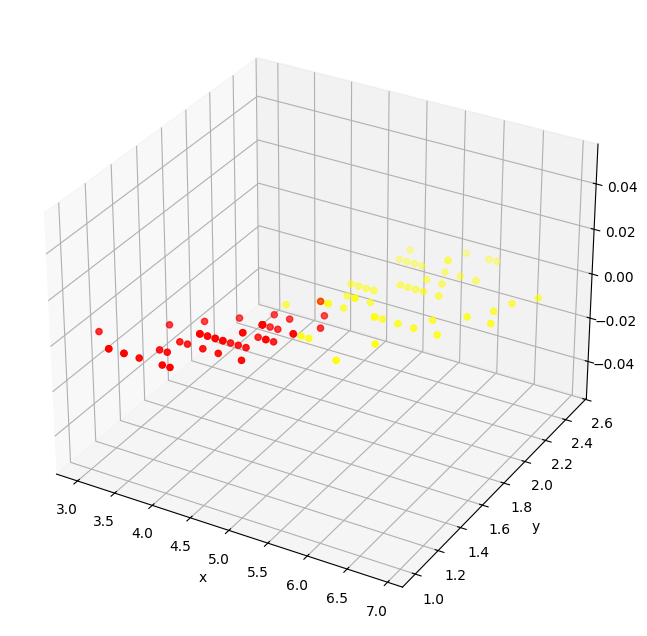

In [11]:
# Visualzing in 3d
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=20, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Split the data into train and test

In [12]:
# Perform train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 2) (70,)
(30, 2) (30,)


In [13]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

# Get the SVM accuracy
predict = model.predict(X_test)
accuracy_score(predict, y_test)

0.8666666666666667

In [14]:
model.support_vectors_

array([[4.5, 1.6],
       [4.9, 1.5],
       [5.1, 1.6],
       [5. , 1.7],
       [4.7, 1.6],
       [4.9, 1.8],
       [4.5, 1.7],
       [4.8, 1.8],
       [4.8, 1.8],
       [5.8, 1.6]])

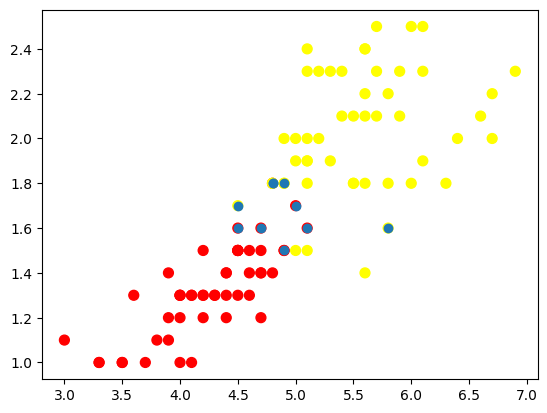

In [15]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1])

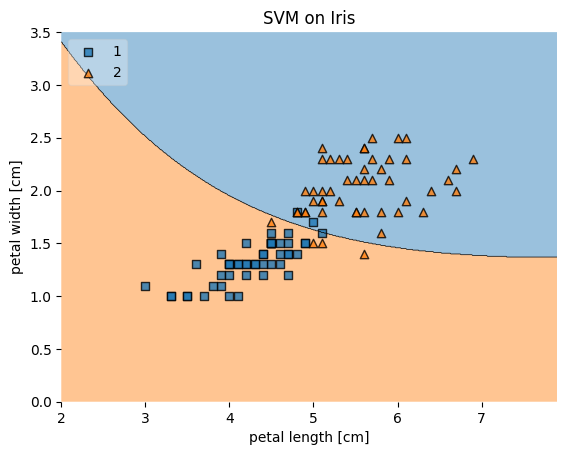

In [16]:
# Plotting decision regions
plot_decision_regions(x.values, y.values, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('SVM on Iris')
plt.show()

## Case 2: Multi class classification


In [17]:
df1 = iris
df1 = df1.drop(['sepal_length','sepal_width'], axis=1)
df1 = df1.replace('setosa', 0)
df1 = df1.replace('versicolor', 1)
df1 = df1.replace('virginica', 2)
df1.head()

/tmp/ipython-input-17-2305212755.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace('virginica', 2)


,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


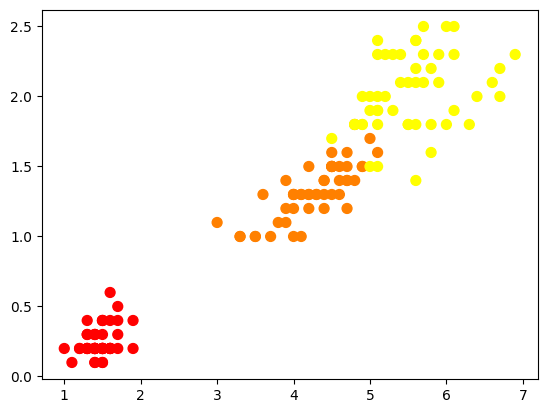

In [18]:
x1 = df1.iloc[:,:2]
y1 = df1['species']

# View the scatter plot
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y1, s=50, cmap='autumn')

In [19]:
# Perform train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(x1.values, y1.values, test_size=0.15)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 2) (127,)
(23, 2) (23,)


In [20]:
# Training, prediction and accuracy
model_mutliclass = SVC(kernel='poly')
model_mutliclass.fit(X_train, y_train)

# Get the SVM accuracy
predict = model_mutliclass.predict(X_test)
accuracy_score(predict, y_test)

1.0

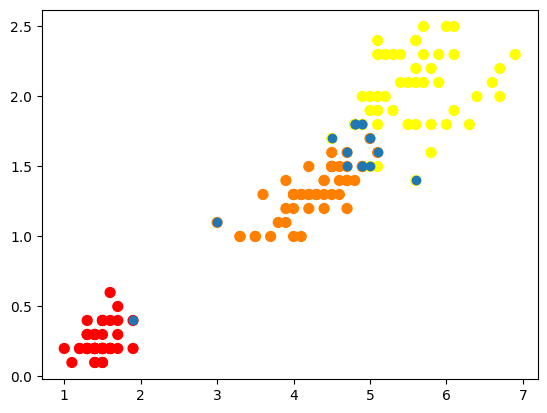

In [21]:
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.scatter(model_mutliclass.support_vectors_[:,0], model_mutliclass.support_vectors_[:,1])

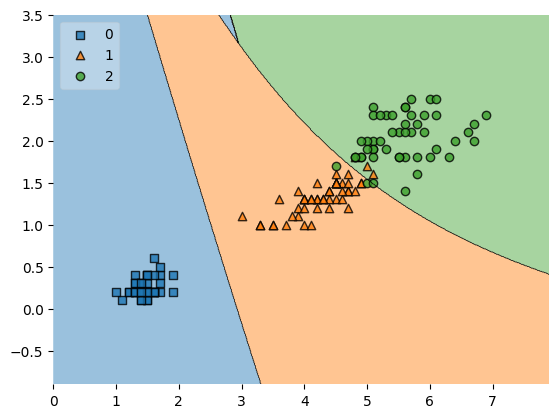

In [22]:
plot_decision_regions(x1.values, y1.values, clf=model_mutliclass, legend=2)
plt.show()

## Please answer the questions below to complete the experiment:

In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [24]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [26]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5664
Date of submission:  26 Jun 2025
Time of submission:  03:14:03
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
